# FYS-2021: Exercise set 2: Regression and Evaulation Metrics

## Task 2a)

First out is linear regression. The book do not provide an explicit formula for this, but one may follow
[this link](https://hpklima.blogspot.com/2014/02/utlede.html) for developing the formulas.


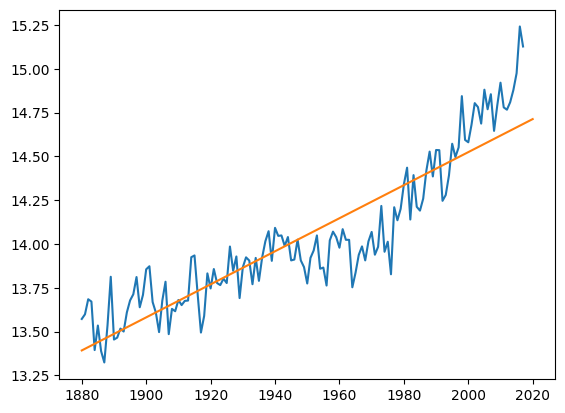

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def linear_regression(x, y) :
    # calculate the slope (m) and intercept (b) of the best-fit line using OLS
    beta_1 = (np.mean(x*y) - np.mean(x)*np.mean(y)) / (np.mean(x*x) - np.mean(x)**2)
    beta_0 = np.mean(y) - beta_1*np.mean(x)
    return beta_0, beta_1

def g(x, beta_0, beta_1):
    return beta_0 + x*beta_1


df = pd.read_csv("data/global-temperatures.csv", sep=" ")
x = df['Year'].to_numpy()
y = df['Temp'].to_numpy()
plt.plot(x,y)

# Now, the linear model
beta_0, beta_1 = linear_regression(x,y)
X = np.arange(1880, 2020, 1/100)
Y = g(X, beta_0, beta_1)
plt.plot(X,Y)

plt.show()


## Task 2b) 
The answer to this may be found in the book, page 82 or at this [link](https://www.ncl.ac.uk/webtemplate/ask-assets/external/maths-resources/statistics/regression-and-correlation/coefficient-of-determination-r-squared.html)

In [9]:
E_RSE = np.sum((y-g(x, beta_0, beta_1))**2)/np.sum((y-np.mean(y))**2)

print(1-E_RSE)

0.8145436075330896


## Task 2c and 2d)
The interpretation of beta_1 would be the annual growth in temperature

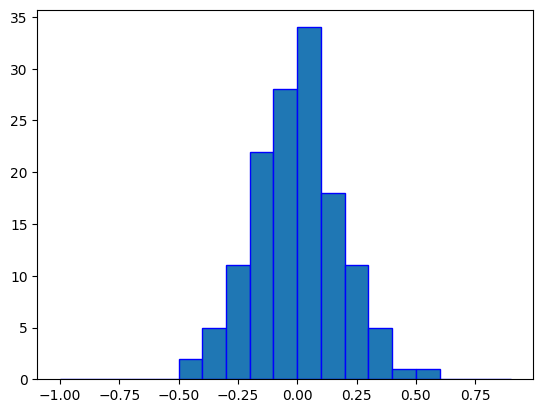

In [10]:
residuals = y - g(x, beta_0, beta_1)

bin = np.arange(-1,1,0.1)
plt.hist(residuals, bins=bin, edgecolor='blue')
plt.show()

Comment: The residuals seems to be very much normal distributed, which coincide very well with the assumption of constant variance of the residuals

## Task 3a)
 The normal equation is given in (5.39) and to implement it we need to use numpy libraries for linear algebra.


In [6]:
df = pd.read_csv("data/auto-mpg.csv", sep=" ")
x1 = df['cylinders'].to_numpy()
x2 = df['displacement'].to_numpy()
x3 = df['horsepower'].to_numpy()
x4 = df['weight'].to_numpy()
x5 = df['acceleration'].to_numpy()
x6 = df['model'].to_numpy()
bias = np.ones(x1.size)

y = df['mpg'].to_numpy()

X = np.vstack((bias,x1,x2,x3,x4,x5,x6))
X = X.transpose()
XX = np.matmul(X.transpose(),X)
XX_inv = np.linalg.inv(XX)
temp = np.matmul(XX_inv,X.transpose())
w = np.matmul(temp, y)
w

array([-1.45352505e+01, -3.29859089e-01,  7.67843024e-03, -3.91355574e-04,
       -6.79461791e-03,  8.52732469e-02,  7.53367180e-01])

## Task 2c)
 Now, for the new prediction function g, it need to perform a dot product between the w-vector and the x-values. Let's just do this in one operation for all the samples

In [7]:
y_pred = np.matmul(X,w)

E_RSE = np.sum((y-y_pred)**2)/np.sum((y-np.mean(y))**2)

print(1-E_RSE)

0.8092552890383932
